In [1]:
# predict probability that any given game will result in a regulation tie

In [2]:
import pandas as pd


In [3]:
# write final modeling data to excel
modeling_data = pd.read_excel(r'data/modeling_data.xlsx', header=0)

# inspect
modeling_data.info()
modeling_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429 entries, 0 to 3428
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              3429 non-null   datetime64[ns]
 1   Season                            3429 non-null   int64         
 2   Game_ID                           3429 non-null   object        
 3   Home_Team                         3429 non-null   object        
 4   Away_Team                         3429 non-null   object        
 5   Odds_1                            3256 non-null   float64       
 6   Odds_X                            3256 non-null   float64       
 7   Odds_2                            3256 non-null   float64       
 8   Reg_Home_Win                      3429 non-null   bool          
 9   Reg_Away_Win                      3429 non-null   bool          
 10  Reg_Tie                           3429 non-null 

,Date,Season,Game_ID,Home_Team,Away_Team,Odds_1,Odds_X,Odds_2,Reg_Home_Win,Reg_Away_Win,...,prop_P1_Home_Goal_Diff_H2H,prop_P2_Home_Goal_Diff_H2H,prop_P3_Home_Goal_Diff_H2H,prop_P1_Away_Goal_Diff_H2H,prop_P2_Away_Goal_Diff_H2H,prop_P3_Away_Goal_Diff_H2H,prop_reg_home_goal_diff_H2H,prop_reg_away_goal_diff_H2H,avg_reg_home_goals_per_game_H2H,avg_reg_away_goals_per_game_H2H
0,2023-09-24,2023,2023-09-24-20:00|Anaheim Ducks vs Los Angeles ...,Anaheim Ducks,Los Angeles Kings,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-09-27,2023,2023-09-27-22:00|Anaheim Ducks vs San Jose Sharks,Anaheim Ducks,San Jose Sharks,NaN,NaN,NaN,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-29,2023,2023-09-29-22:00|Anaheim Ducks vs Los Angeles ...,Anaheim Ducks,Los Angeles Kings,NaN,NaN,NaN,False,True,...,inf,0.0,1.0,0.0,inf,1.0,0.5,0.5,2.0,2.0
3,2023-10-05,2023,2023-10-05-22:00|Anaheim Ducks vs Arizona Coyotes,Anaheim Ducks,Arizona Coyotes,NaN,NaN,NaN,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-15,2023,2023-10-15-20:30|Anaheim Ducks vs Carolina Hur...,Anaheim Ducks,Carolina Hurricanes,4.75,4.75,1.56,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# set season as categorical
modeling_data['Season'] = modeling_data['Season'].astype('str')
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429 entries, 0 to 3428
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              3429 non-null   datetime64[ns]
 1   Season                            3429 non-null   object        
 2   Game_ID                           3429 non-null   object        
 3   Home_Team                         3429 non-null   object        
 4   Away_Team                         3429 non-null   object        
 5   Odds_1                            3256 non-null   float64       
 6   Odds_X                            3256 non-null   float64       
 7   Odds_2                            3256 non-null   float64       
 8   Reg_Home_Win                      3429 non-null   bool          
 9   Reg_Away_Win                      3429 non-null   bool          
 10  Reg_Tie                           3429 non-null 

In [5]:
# inspect count of ties
modeling_data['Reg_Tie'].value_counts()

Reg_Tie
False    2715
True      714
Name: count, dtype: int64

In [6]:
# # drop na to make life easier
# modeling_data = modeling_data.dropna()
# modeling_data.info()

# inspect count of ties
modeling_data['Reg_Tie'].value_counts()

Reg_Tie
False    2715
True      714
Name: count, dtype: int64

In [7]:
# designate response variable
response_ = 'Reg_Tie'

# inspect value counts: ties seem to happen 25% of the time roughly
modeling_data[['Season', response_]].value_counts().sort_index()


Season  Reg_Tie
2023    False      1219
        True        312
2024    False      1208
        True        308
2025    False       288
        True         94
Name: count, dtype: int64

In [8]:
# find ideal sample size to test on all of 2025
samp_size_2025 = modeling_data[modeling_data['Season']=='2025'].shape[0] / modeling_data.shape[0]
print(f'Sample size for 2025 season: {samp_size_2025:.2%}')

modeling_data['Season'].value_counts()

Sample size for 2025 season: 11.14%


Season
2023    1531
2024    1516
2025     382
Name: count, dtype: int64

In [9]:
# list of drop cols that won't be used in modeling
drop_cols = ['Game_ID', 'Date', 'Reg_Home_Win', 'Reg_Away_Win', 'Home_Team', 'Away_Team',
    'Odds_1', 'Odds_X', 'Odds_2', 'Conf_Matchup', 'Div_Matchup', 'Team_Pair', 'Conf_Pair', 'Div_Pair',
]

# leave these commented out for future insertion in list above
# 'Conf_Pair',  'Div_Pair', 

# get P1-P3 cols and drop
p_cols = [col for col in modeling_data.columns if 'P1_' in col or 'P2_' in col or 'P3_' in col]
drop_cols = drop_cols + p_cols

# get X matrix
X = modeling_data.drop(columns=drop_cols + [response_])
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429 entries, 0 to 3428
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Season                            3429 non-null   object 
 1   Month                             3429 non-null   object 
 2   Day_of_Week                       3429 non-null   object 
 3   prop_Reg_Home_Win_Home            3308 non-null   float64
 4   prop_Reg_Away_Win_Home            3308 non-null   float64
 5   prop_Reg_Tie_Home                 3308 non-null   float64
 6   prop_reg_home_goal_diff_Home      3308 non-null   float64
 7   prop_reg_away_goal_diff_Home      3308 non-null   float64
 8   avg_reg_home_goals_per_game_Home  3308 non-null   float64
 9   avg_reg_away_goals_per_game_Home  3308 non-null   float64
 10  prop_Reg_Home_Win_Away            3309 non-null   float64
 11  prop_Reg_Away_Win_Away            3309 non-null   float64
 12  prop_R

In [10]:
# isolate binary response
y_binary = modeling_data[response_].astype(bool) # make sure that this is bool

# inspect y
y_binary.info()

# get class weights to deal with imbalanced dataset
from collections import Counter

counts = Counter(y_binary)
total = sum(counts.values())
class_weights = [total / counts[cls] for cls in sorted(counts)]

# print class weights
print(counts)
print('class weights:', class_weights)
print('pos rate:', y_binary.mean()) 

<class 'pandas.core.series.Series'>
RangeIndex: 3429 entries, 0 to 3428
Series name: Reg_Tie
Non-Null Count  Dtype
--------------  -----
3429 non-null   bool 
dtypes: bool(1)
memory usage: 3.5 KB
Counter({False: 2715, True: 714})
class weights: [1.2629834254143646, 4.802521008403361]
pos rate: 0.20822397200349957


In [11]:
from sklearn.model_selection import train_test_split

# 1. Train/test split (preserve time order)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, train_size=0.9, shuffle=False
)


In [12]:
# fit a single catboost classifier with defaults
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score

# 2. Define categorical features
# cat_features = ['Season', 'Month', 'Day_of_Week', 'Conf_Pair', 'Div_Pair', 'Team_Pair']
# cat_features = ['Season', 'Month', 'Day_of_Week', 'Start_Hour_Group']
cat_features = ['Season', 'Month', 'Day_of_Week']

# 3. Create Pools
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# 4. Train model with reasonable defaults
basic_model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.03,
    class_weights=class_weights, # to fix class imbalance
    boosting_type='Ordered',     # ensure data is ordered
    verbose=100
)

# Fit with early stopping
basic_model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50,
    use_best_model=True
)

# 5. Predict and evaluate
y_pred = basic_model.predict(test_pool)

# 5. Predict and evaluate proba
y_pred_proba = basic_model.predict_proba(test_pool)[:, 1]

# classification report
print(classification_report(y_test, y_pred))

# calc auc, accuracy, and pos rate
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
pos_rate = y_test.mean()

print('acc:', acc)
print('auc:', auc)
print('pos_rate:', pos_rate)


0:	learn: 0.6919405	test: 0.6937418	best: 0.6937418 (0)	total: 187ms	remaining: 4m 39s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6933880603
bestIteration = 2

Shrink model to first 3 iterations.
              precision    recall  f1-score   support

       False       0.82      0.50      0.62       275
        True       0.22      0.56      0.31        68

    accuracy                           0.51       343
   macro avg       0.52      0.53      0.47       343
weighted avg       0.70      0.51      0.56       343

acc: 0.5102040816326531
auc: 0.5041978609625668
pos_rate: 0.19825072886297376


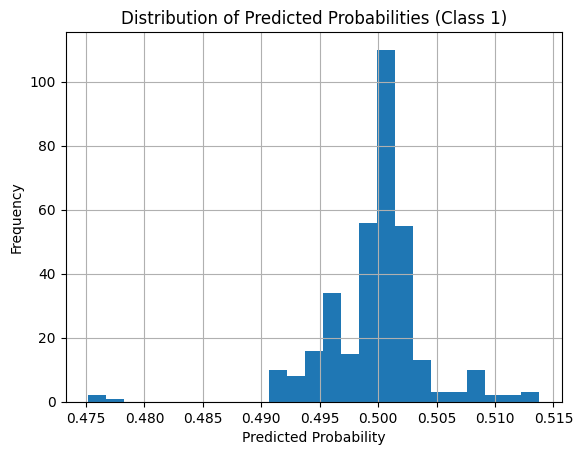

In [13]:
import matplotlib.pyplot as plt

# get y_probs and plot
y_probs = basic_model.predict_proba(test_pool)[:, 1]

plt.hist(y_probs, bins=25)
plt.title("Distribution of Predicted Probabilities (Class 1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
# 5. Set your custom positive threshold
custom_threshold = 0.503 # You can change this value

# 6. Predict probabilities and apply threshold
y_probs = basic_model.predict_proba(test_pool)[:, 1]
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# 7. Evaluate
print(f"\nConfusion Matrix at threshold {custom_threshold}:")
print(confusion_matrix(y_test, y_pred_custom))
print(f"\nClassification Report at threshold {custom_threshold}:")
print(classification_report(y_test, y_pred_custom))

C:\Users\edrak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


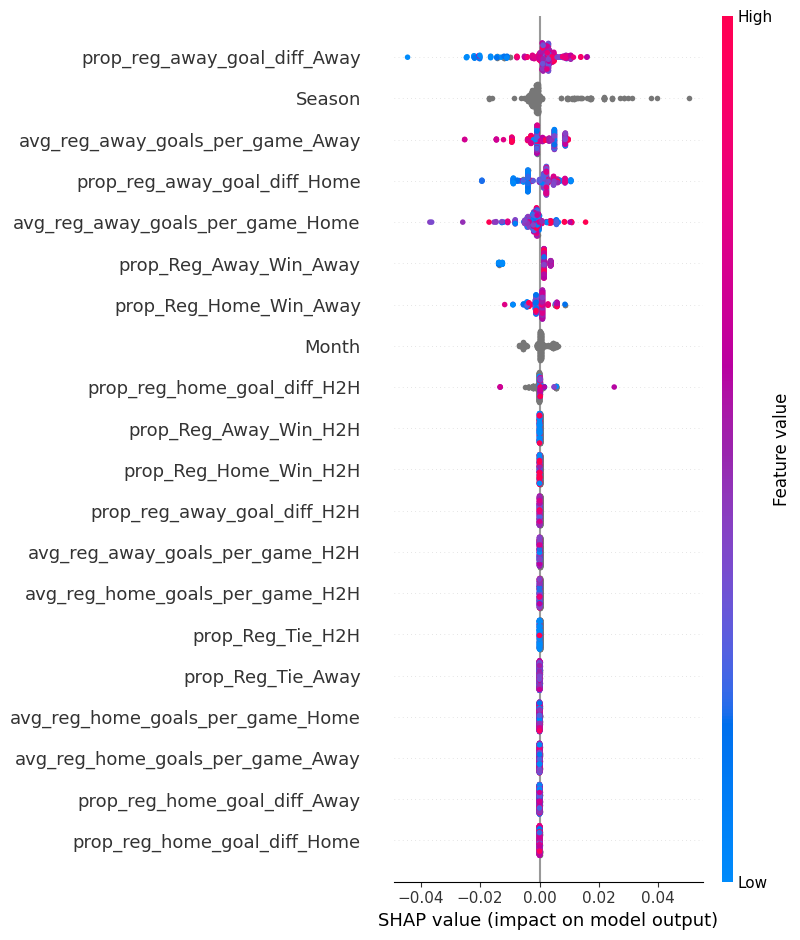

In [14]:
import numpy as np
import pandas as pd
import shap

# ---- Existing model training code remains unchanged ----

# 6. Get SHAP values from the model
shap_values = basic_model.get_feature_importance(
    data=test_pool,
    type='ShapValues'  # returns SHAP values + expected value
)

# 7. Extract feature names
feature_names = X_test.columns.tolist()

# 8. Create DataFrame for SHAP values (excluding last column which is base value)
shap_df = pd.DataFrame(shap_values[:, :-1], columns=feature_names)

# 9. Optional: Summary plot (global feature importance)
shap.summary_plot(shap_values[:, :-1], X_test, feature_names=feature_names)


In [15]:
# 10. Calculate mean absolute SHAP value for each feature
shap_mean_importance = shap_df.abs().mean().sort_values(ascending=False)

# 11. Display as DataFrame
shap_ranking_df = pd.DataFrame({
    'Feature': shap_mean_importance.index,
    'MeanAbsSHAP': shap_mean_importance.values
})

# update my code to show all rows of shap ranking df
pd.set_option('display.max_rows', None)

# Show top 20 most important features
print(shap_ranking_df.head(200))

                             Feature  MeanAbsSHAP
0       prop_reg_away_goal_diff_Away     0.004878
1                             Season     0.004480
2   avg_reg_away_goals_per_game_Away     0.003934
3       prop_reg_away_goal_diff_Home     0.003877
4   avg_reg_away_goals_per_game_Home     0.003101
5             prop_Reg_Away_Win_Away     0.002951
6             prop_Reg_Home_Win_Away     0.001858
7                              Month     0.001819
8        prop_reg_home_goal_diff_H2H     0.000841
9       prop_reg_home_goal_diff_Home     0.000000
10            prop_Reg_Away_Win_Home     0.000000
11            prop_Reg_Home_Win_Home     0.000000
12                       Day_of_Week     0.000000
13                 prop_Reg_Tie_Home     0.000000
14  avg_reg_home_goals_per_game_Home     0.000000
15                 prop_Reg_Tie_Away     0.000000
16  avg_reg_home_goals_per_game_Away     0.000000
17      prop_reg_home_goal_diff_Away     0.000000
18             prop_Reg_Away_Win_H2H     0.000000


In [16]:
import joblib

# write model to pkl file
joblib.dump(basic_model, 'model/catboost_model_reg_tie.pkl')


['model/catboost_model_reg_tie.pkl']